# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

colab = 1

if colab:
  from google.colab import drive
  drive.mount('/gdrive')
  %cd /gdrive/MyDrive/$03DSCoding/$75code_mipt_course_ML/homeworks/lab01_ml_pipeline
  %ls

Mounted at /gdrive
/gdrive/MyDrive/$03DSCoding/$75code_mipt_course_ML/homeworks/lab01_ml_pipeline
car_data.csv                Lab1_part2_ml_pipeline.ipynb
catboost_info/              Lab1_part3_SVM.ipynb
column_names.json           Lab1_part3_SVM_shalvinskiy.ipynb
grad.png                    README.md
Lab1_part1_questions.ipynb


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First  7 of our dataset.
X_train_pd.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,252,84,44,80,140,58,11,156,44,20,157,166,349,176,74,5,17,183,193
1,131,86,36,77,165,60,7,150,45,19,128,174,331,131,66,0,32,196,203
2,379,105,56,98,209,64,11,217,31,24,173,225,696,216,72,2,19,188,199
3,676,82,43,73,158,68,7,151,44,19,145,181,337,173,80,2,17,183,188
4,229,86,41,64,148,61,5,150,45,19,138,165,333,173,80,5,8,182,185
5,332,99,57,109,220,66,11,221,30,25,176,234,725,236,70,10,25,188,200
6,785,85,43,66,123,56,6,148,46,19,145,166,319,171,85,6,11,179,182


In [4]:
set(y_train)   # уникальные значения

{'bus', 'opel', 'saab', 'van'}

Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,421.856102,93.872495,44.681239,82.071038,169.471767,61.777778,8.595628,168.748634,40.925319,20.579235,147.546448,188.697632,439.604736,173.57377,72.285974,6.402550,12.666667,189.289617,195.938069
std,244.918874,8.256724,6.123012,15.730290,33.280022,8.091278,4.937978,33.252169,7.784499,2.587097,14.319737,31.384123,176.909650,33.11163,7.744094,4.965949,8.814181,6.376129,7.704854
min,0.000000,76.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,112.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,209.000000,88.000000,40.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,136.000000,168.000000,320.000000,147.00000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,428.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,365.000000,173.00000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,634.000000,100.000000,49.000000,98.000000,196.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,583.000000,197.00000,75.000000,9.000000,18.000000,194.000000,202.000000
max,843.000000,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,59.000000,29.000000,182.000000,288.000000,1018.000000,268.00000,127.000000,22.000000,41.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
### YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
'''
lr = LogisticRegression() # add some params
svm = SVC(kernel='linear') # here too
svm.fit(moons_points, moons_labels)
lr.fit(moons_points, moons
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
'''

"\nlr = LogisticRegression() # add some params\nsvm = SVC(kernel='linear') # here too\nsvm.fit(moons_points, moons_labels)\nlr.fit(moons_points, moons\nLogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)\n"

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
### YOUR CODE HERE
# automaticlly do crossvalidation and select best model
clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0, penalty='l2')

pipelogreg = Pipeline(steps=[("Normalization", MinMaxScaler()), ("classifier", clf)])

pipelogreg.fit(X_train, y_train)

Pipeline(steps=[('Normalization', MinMaxScaler()),
                ('classifier',
                 LogisticRegressionCV(max_iter=500, multi_class='multinomial',
                                      random_state=0, solver='saga',
                                      tol=0.001))])

In [9]:
y_pred = pipelogreg.predict(X_test)
print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred, average='micro'))
#print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
#print(f1_score(y_test, y_pred, average=None))

0.7878787878787878
0.7840794462903649


In [10]:
  # You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


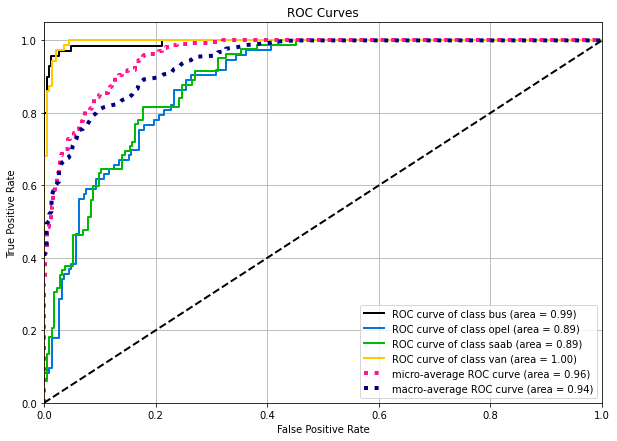

In [11]:
import scikitplot
import matplotlib.pyplot as plt

scikitplot.metrics.plot_roc_curve(y_test, pipelogreg.predict_proba(X_test), figsize=(10,7))
plt.grid()
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [12]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(StandardScaler().fit_transform(X_train))


PCA(n_components=15)

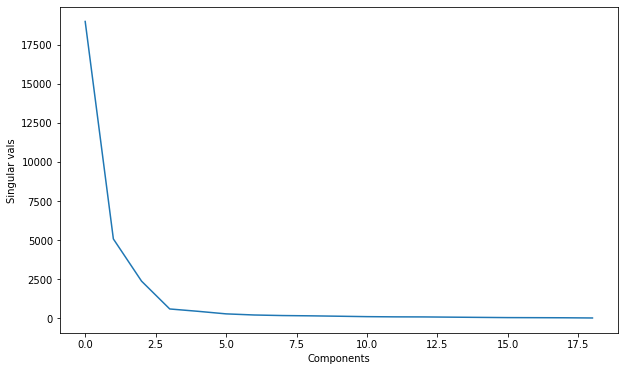

In [13]:
import matplotlib.pyplot as plt

U, S, V = np.linalg.svd(X_train, full_matrices=False)
plt.figure(figsize=(10,6))
plt.plot(S)
plt.xlabel('Components')
plt.ylabel("Singular vals")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
### YOUR CODE HERE
### YOUR CODE HERE
pca = PCA(n_components= 15)
clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)

ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca)])
New_data = ppl.fit_transform(X_train, y_train)

Мы выбираем 15-компонентный PCA. Мы видим, что после 15-го компонента на объясненном графике дисперсии мы не видим уменьшения. 

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
### YOUR CODE HERE
### YOUR CODE HERE
#scl = StandardScaler()
pca = PCA(n_components= 15)
clf = LogisticRegressionCV(refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)

ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])
ppl.fit(X_train, y_train)
#X1 = scl.fit_transform(X_train)
#X2 = pca.fit_transform(X1)
#clf.fit(X2, y_train)

Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 LogisticRegressionCV(max_iter=500, multi_class='multinomial',
                                      random_state=0, solver='saga',
                                      tol=0.001))])

In [16]:
y_pred = ppl.predict(X_test)
print(accuracy_score(y_test, y_pred))
#print(f1_score(y_test, y_pred, average='micro'))
#print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
#print(f1_score(y_test, y_pred, average=None))

0.7609427609427609
0.7549490884725045


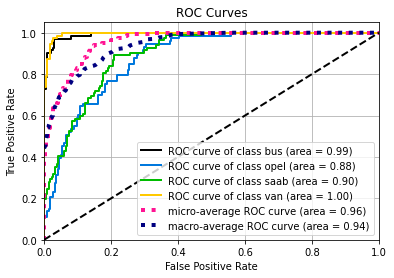

In [17]:
scikitplot.metrics.plot_roc(y_test, ppl.predict_proba(X_test))
plt.grid()
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [18]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

# YOUR CODE HERE
pca = PCA(n_components=15)

parameters = {'max_depth':range(1, 15)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, n_jobs=4)
ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

ppl.fit(X_train, y_train)


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                              n_jobs=4,
                              param_grid={'max_depth': range(1, 15)}))])

In [19]:
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

ppl_best = Pipeline(steps=[("Normalize", StandardScaler()),("PCA", pca), ("classifier", clf.best_estimator_)])
ppl_best.fit(X_train, y_train)

0.6574478732276898 {'max_depth': 8}


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=8, random_state=0))])

In [20]:
y_pred = ppl_best.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.6464646464646465
0.6464646464646465
0.6489483399436254
0.6398416049542295
[0.84       0.53012048 0.42857143 0.79710145]


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [21]:
# YOUR CODE HERE

In [22]:
from sklearn.ensemble import BaggingClassifier

accurs = []
f1__ = []
nm_lrs = []
for n_estim in tqdm(range(2, 100, 20)):
    pca = PCA(n_components= 15)
    clf = LogisticRegressionCV(multi_class='multinomial',refit=True, solver="saga", multi_class='multinomial', tol=1e-3, max_iter=500, random_state=0)
    ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

    bclf = BaggingClassifier(base_estimator=ppl, n_estimators=n_estim, random_state=0).fit(X_train, y_train)

    print(f"Boostrap size {n_estim}")
    y_pred = bclf.predict(X_test)
    accurs.append(accuracy_score(y_test, y_pred))
    f1__.append(f1_score(y_test, y_pred, average='weighted'))
    nm_lrs.append(n_estim)
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred, average='weighted'))
    #print(f1_score(y_test, y_pred, average=None))
    print("\n")

Boostrap size 2
0.7676767676767676
0.7610574299786469


Boostrap size 7
0.7777777777777778
0.7709638620143383


Boostrap size 12
0.7710437710437711
0.7663450313757062


Boostrap size 17
0.7676767676767676
0.7624008274315023


Boostrap size 22
0.7744107744107744
0.7687393131496744


Boostrap size 27
0.7676767676767676
0.7625392950967247


Boostrap size 32
0.7643097643097643
0.7583170465170233


Boostrap size 37
0.7710437710437711
0.7658062453537732


Boostrap size 42
0.7710437710437711
0.7658062453537732


Boostrap size 47
0.7676767676767676
0.7625392950967247


Boostrap size 52
0.7710437710437711
0.7658062453537732


Boostrap size 57
0.7676767676767676
0.7625392950967247


Boostrap size 62
0.7609427609427609
0.7550875844614271


Boostrap size 67
0.7609427609427609
0.7555113421674217


Boostrap size 72
0.7643097643097643
0.7592394658263799


Boostrap size 77
0.7643097643097643
0.7592394658263799


Boostrap size 82
0.7676767676767676
0.7629397537148659


Boostrap size 87
0.76767676767676

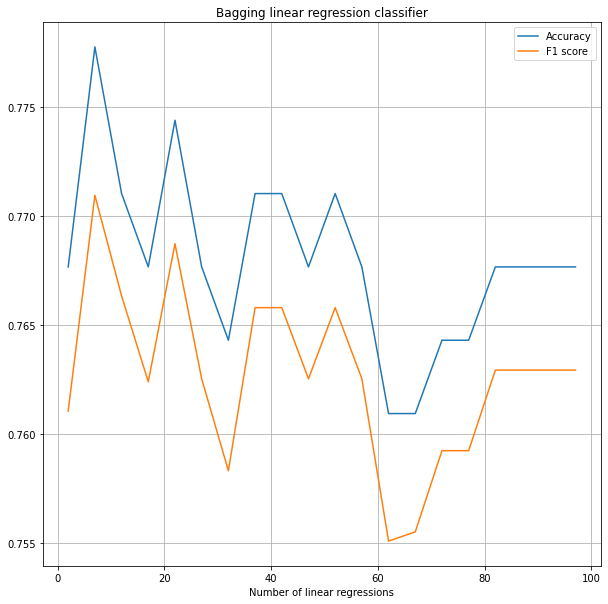

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(nm_lrs, accurs)
plt.plot(nm_lrs, f1__)
plt.grid()
plt.xlabel("Number of linear regressions")
plt.legend(["Accuracy", "F1 score"])
plt.title("Bagging linear regression classifier")
plt.show()

In [24]:
accurs = []
f1__ = []
nm_lrs = []
for n_estim in range(2, 100, 5):
    pca = PCA(n_components=15)

    parameters = {'max_depth':range(1, 15)}
    clf = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, n_jobs=4)
    ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

    bclf = BaggingClassifier(base_estimator=ppl, n_estimators=n_estim, random_state=0).fit(X_train, y_train)

    print(f"Boostrap size: {n_estim}")
    y_pred = bclf.predict(X_test)
    accurs.append(accuracy_score(y_test, y_pred))
    f1__.append(f1_score(y_test, y_pred, average='weighted'))
    nm_lrs.append(n_estim)
    print(accuracy_score(y_test, y_pred))
    #print(f1_score(y_test, y_pred, average='micro'))
    #print(f1_score(y_test, y_pred, average='macro'))
    print(f1_score(y_test, y_pred, average='weighted'))
    #print(f1_score(y_test, y_pred, average=None))
    print("\n")

Boostrap size: 2
0.632996632996633
0.6210764904296797


Boostrap size: 7
0.7037037037037037
0.6968563448655508


Boostrap size: 12
0.7239057239057239
0.7175616789804897


Boostrap size: 17
0.7575757575757576
0.7517078364555261


Boostrap size: 22
0.7710437710437711
0.76417902899344


Boostrap size: 27
0.7777777777777778
0.7740770950641035


Boostrap size: 32
0.7676767676767676
0.7636658944396728


Boostrap size: 37
0.7676767676767676
0.7633479775917917


Boostrap size: 42
0.7643097643097643
0.758909209479409


Boostrap size: 47
0.7744107744107744
0.7713044237197025


Boostrap size: 52
0.7777777777777778
0.7747062302386932


Boostrap size: 57
0.7878787878787878
0.785096260182695


Boostrap size: 62
0.7710437710437711
0.7673167616048411


Boostrap size: 67
0.7710437710437711
0.7670662956094514


Boostrap size: 72
0.7710437710437711
0.7670228262067434


Boostrap size: 77
0.7643097643097643
0.7601981664089811


Boostrap size: 82
0.7777777777777778
0.7740276980250739


Boostrap size: 87
0.7

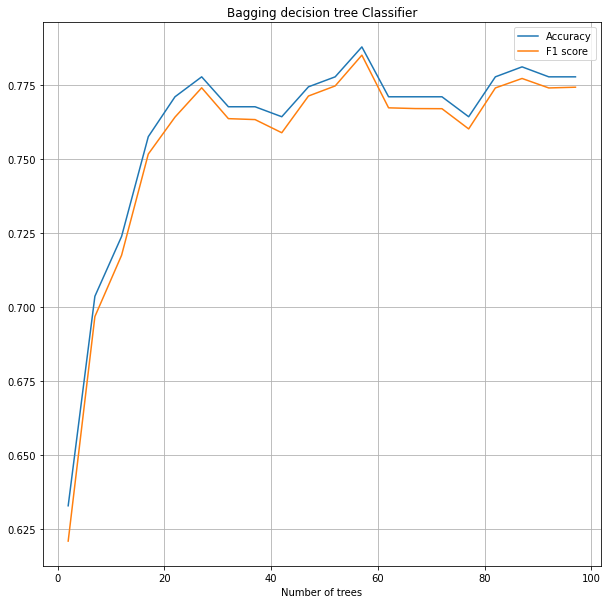

In [25]:
plt.figure(figsize=(10, 10))
plt.plot(nm_lrs, accurs)
plt.plot(nm_lrs, f1__)
plt.grid()
plt.xlabel("Number of trees")
plt.legend(["Accuracy", "F1 score"])
plt.title("Bagging decision tree Classifier")
plt.show()

We can see that after 32 decision tree used in bagging our performance starts to oscillate. So around 32 agorithm is an optimal number of bagging.

Decision tree is an unstable algorithm so it's expected that bagging can improve our metrics a lot.

I think that optimal tree depth will be lower compared to one decision tree as with bagging we can reduce error of our algorithm without using more coplex trees.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [26]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

pca = PCA(n_components=15)

parameters = {'n_estimators':range(2, 100, 5)}
clf = GridSearchCV(RandomForestClassifier(random_state=0, max_depth=11), parameters, n_jobs=4)

ppl = Pipeline(steps=[("Normalize", StandardScaler()), ("PCA", pca), ("classifier", clf)])

ppl.fit(X_train, y_train)


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 GridSearchCV(estimator=RandomForestClassifier(max_depth=11,
                                                               random_state=0),
                              n_jobs=4,
                              param_grid={'n_estimators': range(2, 100, 5)}))])

In [27]:
print (clf.best_score_, clf.best_params_) 

ppl_best = Pipeline(steps=[("Normalize", StandardScaler()),("PCA", pca), ("classifier", clf.best_estimator_)])
ppl_best.fit(X_train, y_train)

0.7795663052543786 {'n_estimators': 97}


Pipeline(steps=[('Normalize', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('classifier',
                 RandomForestClassifier(max_depth=11, n_estimators=97,
                                        random_state=0))])

In [28]:
y_pred = ppl_best.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.7542087542087542
0.7542087542087542
0.757474028106959
0.749716816619956
[0.94366197 0.60759494 0.57931034 0.89932886]


Our optimal numer of trees is 77. It's is different from our results with bagging.  We found optimal number of trees with greed search - so we might be in an oscillation zone, but get some maximum spike.

Also random forest split tree using only subset of features. So, we might need bigger number of trees to reduce error of algorithm.

#### 2.8. Gradient boosting
Now select the gradient boosting framework you prefer (LightGBM, XGBoost, CatBoost) and repeat the same experiments.

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal size of the you've got? Explain the results briefly.

In [29]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 10.4 MB/s 


In [30]:
from catboost import CatBoostClassifier, Pool

In [31]:
pca = PCA(n_components=15)
ppl = Pipeline(steps=[("Normalize", StandardScaler()),("PCA", pca)])

In [ ]:
catboost2 = CatBoostClassifier(random_seed=4, verbose=0, learning_rate=1, num_trees=4000, depth=8)#2000
catboost2_train = Pool(data = ppl.fit_transform(X_train), label=y_train)
catboost2.fit(catboost2_train)

In [ ]:
y_pred = catboost2.predict(ppl.transform(X_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

We have a lot of parameters in gradient boosting so it's hard to do a full greed earch for them.

 Generally, restricting max tree depth is useful for improving peed of convergency but it's not always improve performance significantly. So we chose max depth from speed of convergency consideratons

We use default number of iteration for catboost, so we need to big learning rate in order to sucsessfully converge.

We choose number of trees for gradient boosting as a compromise between metrics results, speed of convergency.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
X_train.size

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
split = skf.split(X_train, y_train)
X_train_new = []
y_train_new = []
size_of_data = []
logistic= LogisticRegressionCV(multi_class='multinomial', solver='saga' ,tol=1e-3,max_iter=500 )
acc = []
f1 = []
for j,i in split:
  if len(X_train_new) == 0:
      X_train_new = X_train[i]
      y_train_new = y_train[i]
  else:
      X_train_new = np.concatenate((X_train_new, X_train[i]),axis = 0)
      y_train_new = np.concatenate((y_train_new, y_train[i]))
  logistic.fit(X_train_new,y_train_new)
  y_pred = logistic.predict(X_test)
  size_of_data.append(X_train_new.shape[0])
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, acc)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
split = skf.split(X_train, y_train)
X_train_new = []
y_train_new = []
size_of_data = []
logistic= DecisionTreeClassifier(max_depth=17)
acc = []
f1 = []
for j,i in split:
  if len(X_train_new) == 0:
      X_train_new = X_train[i]
      y_train_new = y_train[i]
  else:
      X_train_new = np.concatenate((X_train_new, X_train[i]),axis = 0)
      y_train_new = np.concatenate((y_train_new, y_train[i]))
  logistic.fit(X_train_new,y_train_new)
  y_pred = logistic.predict(X_test)
  size_of_data.append(X_train_new.shape[0])
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, acc)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, f1)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
split = skf.split(X_train, y_train)
X_train_new = []
y_train_new = []
size_of_data = []
logistic = RandomForestClassifier(n_estimators=50)

acc = []
f1 = []
for j,i in split:
  if len(X_train_new) == 0:
      X_train_new = X_train[i]
      y_train_new = y_train[i]
  else:
      X_train_new = np.concatenate((X_train_new, X_train[i]),axis = 0)
      y_train_new = np.concatenate((y_train_new, y_train[i]))
  logistic.fit(X_train_new,y_train_new)
  y_pred = logistic.predict(X_test)
  size_of_data.append(X_train_new.shape[0])
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, acc)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, f1)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

Показатели улучшаются при растущей обучающей выборке. Но иногда результаты могут иметь неожиданное падение производительности. Это может быть вызвано несбалансированностью классов, которая возникает при добавлении новых данных. В некоторых классах происходит overfitting, а в некоторых underfitting поэтому происходит уменьшение.